# Basic NLP (Natural Language Processing)

## Twitter sentiment analysis

### Install stuff and set dependencies

In [1]:
!python -m spacy download en_core_web_sm

Looking in indexes: http://pypi.hudltools.com
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## Import dependencies and set options

In [2]:
from os import path, listdir
import seaborn as sns
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import math
import nltk
from random import randrange
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sns.set()
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

display_type = 'users'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chris.hunt/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Grab some Tweets

In [3]:
tweet_path = "./get-twitter-data/tweets/search" if display_type == 'search' else "./get-twitter-data/tweets/user"
tweet_text_field = "text" if display_type == 'search' else "full_text"

In [4]:
full_filenames = []
filenames = []
for filename in listdir(tweet_path):
    filenames.append(filename)
    full_filenames.append(path.join(tweet_path, filename))
    
keys = [ f.replace('.json', '').lower() for f in filenames ]


def add_sentiment(df_tweets):
    df_tweets['polarity'] = None
    df_tweets['subjectivity'] = None
    from textblob import TextBlob
    for i, row in df_tweets.iterrows():
        # print(tweets[i])
        sentiment = TextBlob(row[tweet_text_field]).sentiment
        df_tweets.at[i, 'polarity'] = sentiment.polarity
        df_tweets.at[i, 'subjectivity'] = sentiment.subjectivity
    df_tweets[["polarity", "subjectivity"]] = df_tweets[["polarity", "subjectivity"]].apply(pd.to_numeric)
    return df_tweets

# def add_sentiment(df_tweets):
#     df_tweets['polarity'] = None
#     df_tweets['subjectivity'] = None
#     from textblob import TextBlob
#     for i, row in df_tweets.iterrows():
#         # print(tweets[i])
#         sentiment = sid.polarity_scores(row['full_text'])
#         df_tweets.at[i, 'polarity'] = sentiment['compound']
#     df_tweets[["polarity", "subjectivity"]] = df_tweets[["polarity", "subjectivity"]].apply(pd.to_numeric)
#     return df_tweets

def get_sentiment(text):
    s = flair.data.Sentence(text)
    classifier.predict(s)
    t= s.labels
    sentiment = (1 if s.labels[0].value == 'POSITIVE' else -1) * s.labels[0].score
    return sentiment

# def add_sentiment(df_tweets):
#     df_tweets['polarity'] = None
#     df_tweets['subjectivity'] = None
#     for i, row in df_tweets.iterrows():
#         print(i)
#         df_tweets.at[i, 'polarity'] = get_sentiment(row['full_text'])
#     df_tweets[["polarity", "subjectivity"]] = df_tweets[["polarity", "subjectivity"]].apply(pd.to_numeric)
#     return df_tweets


def get_tweets(key_in):
    for key, filename in zip(keys, full_filenames):
        if key_in == key:
            f = open(filename, "r")
            print(f"Loading {filename}")
            all_tweets = json.load(f)
            for i, tweet in enumerate(all_tweets):
                tweet_date = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
                tweet['created_at'] = tweet_date
                tweet['created_at_timestamp'] = datetime.timestamp(tweet_date)
                all_tweets[i] = tweet
            f.close()
            df = add_sentiment(pd.DataFrame.from_dict(all_tweets[:]))
            df['screen_name'] = df['user'].apply(lambda x: x['screen_name'])
            df['key'] = key
            if 'metadata' in list(df.columns):
                df = df.drop(['metadata'], axis=1)
            return df.drop(['entities'], axis=1)
        

In [5]:
tweets = {k: get_tweets(k) for k in keys}

Loading ./get-twitter-data/tweets/user/dereknordgren.json
Loading ./get-twitter-data/tweets/user/noble_man.json
Loading ./get-twitter-data/tweets/user/damturSpeaks.json
Loading ./get-twitter-data/tweets/user/hannnahbeach.json
Loading ./get-twitter-data/tweets/user/barnes_joe.json
Loading ./get-twitter-data/tweets/user/c_m_hunt.json
Loading ./get-twitter-data/tweets/user/harry__peters.json


In [6]:
keys

['dereknordgren',
 'noble_man',
 'damturspeaks',
 'hannnahbeach',
 'barnes_joe',
 'c_m_hunt',
 'harry__peters']

### Plot and have a look at Polarity

In [7]:
for k in keys:
    df = tweets[k]
    print(f"{k} - {df['polarity'].mean()}")

dereknordgren - 0.1646537522746107
noble_man - 0.13354788987125116
damturspeaks - 0.34273115773115775
hannnahbeach - 0.09131469705420445
barnes_joe - 0.09025934390606755
c_m_hunt - 0.09906663149493185
harry__peters - 0.1868719766048829


In [8]:
key_id = randrange(0, len(keys)-1)
key = list(keys)[key_id]
key

'dereknordgren'

In [9]:
df = tweets[key]

In [10]:
df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,created_at_timestamp,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,polarity,subjectivity,screen_name,key
0,2020-01-03 23:26:45+00:00,1213240309200670700,1213240309200670721,"I hear it from everyone but wow, flying out of #LNK is incredible. Baggage check and security to...",False,"[0, 226]","<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>",NaN,None,NaN,None,None,"{'id': 865563278, 'id_str': '865563278', 'name': 'Derek Nordgren', 'screen_name': 'dereknordgren...",None,None,None,None,False,0,3,False,False,en,1.578094e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.332857,0.614286,dereknordgren,dereknordgren
1,2019-11-29 07:04:21+00:00,1200309506116374500,1200309506116374528,Best way to start a vacation? Free bottomless breakfast and coffee in a great lounge. Thanks @pr...,False,"[0, 118]","<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>",NaN,None,NaN,None,None,"{'id': 865563278, 'id_str': '865563278', 'name': 'Derek Nordgren', 'screen_name': 'dereknordgren...",None,None,None,None,False,0,2,False,False,en,1.575011e+09,"{'media': [{'id': 1200309498495340500, 'id_str': '1200309498495340544', 'indices': [119, 142], '...",False,NaN,NaN,NaN,NaN,0.600000,0.512500,dereknordgren,dereknordgren
2,2019-10-23 18:07:03+00:00,1187067929218703400,1187067929218703372,"Pop quiz: based on the gender stereotypes in this, was it published in 1918 or 2018? 😂\n\nToo ma...",False,"[0, 179]","<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>",NaN,None,NaN,None,None,"{'id': 865563278, 'id_str': '865563278', 'name': 'Derek Nordgren', 'screen_name': 'dereknordgren...",None,None,None,None,False,0,1,False,False,en,1.571854e+09,NaN,False,NaN,NaN,NaN,NaN,0.166667,0.796296,dereknordgren,dereknordgren
3,2019-08-31 22:29:21+00:00,1167927380763037700,1167927380763037697,"Us (Jordan Peele) was the worst movie I’ve seen in a while. 2/10 at best. Strange plot, strange ...",False,"[0, 132]","<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>",NaN,None,NaN,None,None,"{'id': 865563278, 'id_str': '865563278', 'name': 'Derek Nordgren', 'screen_name': 'dereknordgren...",None,None,None,None,False,0,2,False,False,en,1.567291e+09,NaN,NaN,NaN,NaN,NaN,NaN,-0.020000,0.320000,dereknordgren,dereknordgren
4,2019-08-04 20:36:14+00:00,1158114444087627800,1158114444087627776,"Whoa, the last 5 min of The Jinx on HBO are better than the entire rest of the series combined. ...",False,"[0, 130]","<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>",NaN,None,NaN,None,None,"{'id': 865563278, 'id_str': '865563278', 'name': 'Derek Nordgren', 'screen_name': 'dereknordgren...",None,None,None,None,False,0,0,False,False,en,1.564951e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.547917,dereknordgren,dereknordgren


In [11]:
df.sort_values(['polarity']).head(5)[['created_at', 'screen_name','id_str','polarity',tweet_text_field]]

,created_at,screen_name,id_str,polarity,full_text
14,2018-09-19 13:34:02+00:00,dereknordgren,1042406462507687936,-1.0,Our healthcare system is so messed up. Walmart wanted remove from its healthcare networks the 5%...
69,2016-01-10 00:46:58+00:00,dereknordgren,685986153699213312,-1.0,@POTUS how dare you propose this horrific system https://t.co/y1gJAAQIof 😂
231,2013-12-01 00:32:16+00:00,dereknordgren,406943797306998784,-0.8,"I hate to say it Husker fans, but that just topped our Northwestern finish. #WarEagle #GBR"
127,2014-11-01 02:11:17+00:00,dereknordgren,528368650882142208,-0.7,Yeah we're bad ass. http://t.co/mqNJMKYxUD http://t.co/EJKQK0GL7O
336,2013-03-31 22:07:51+00:00,dereknordgren,318484815278125056,-0.7,"Prayers for Kevin Ware, and a speedy recovery. That's just too bad."


In [12]:
df.sort_values(['polarity'], ascending=False).head(5)[['created_at', 'screen_name','id_str','polarity',tweet_text_field]]

,created_at,screen_name,id_str,polarity,full_text
176,2014-05-19 17:25:27+00:00,dereknordgren,468442322229686272,1.0,RIP to the legendary Mullin hoop. http://t.co/VioAuPUy6J
261,2013-09-21 22:50:10+00:00,dereknordgren,381550952588660736,1.0,B Reilly!! I feel the start of a great career! @brandonreilly01 #GBR
106,2015-07-03 00:08:03+00:00,dereknordgren,616760277367828481,1.0,Best company bonding ever #HudlUp http://t.co/I8mus4MstO
115,2015-01-16 22:55:20+00:00,dereknordgren,556223202897051649,1.0,@Spotify you’re the best ❤ http://t.co/M6U23DP9OB
312,2013-05-27 19:34:52+00:00,dereknordgren,339102424818126848,1.0,Best girlfriend award…@ellenleslie\nReason…she got us tickets to see Tosh\n#ToshTour2013


In [13]:
# fig, ax = plt.subplots(figsize=(15,8))
# sns.lineplot(data=df[:], x='created_at_timestamp', y='polarity')
# xticks = ax.get_xticks()
# # convert all xtick labels to selected format from ms timestamp
# ax.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks],
#  rotation=50)

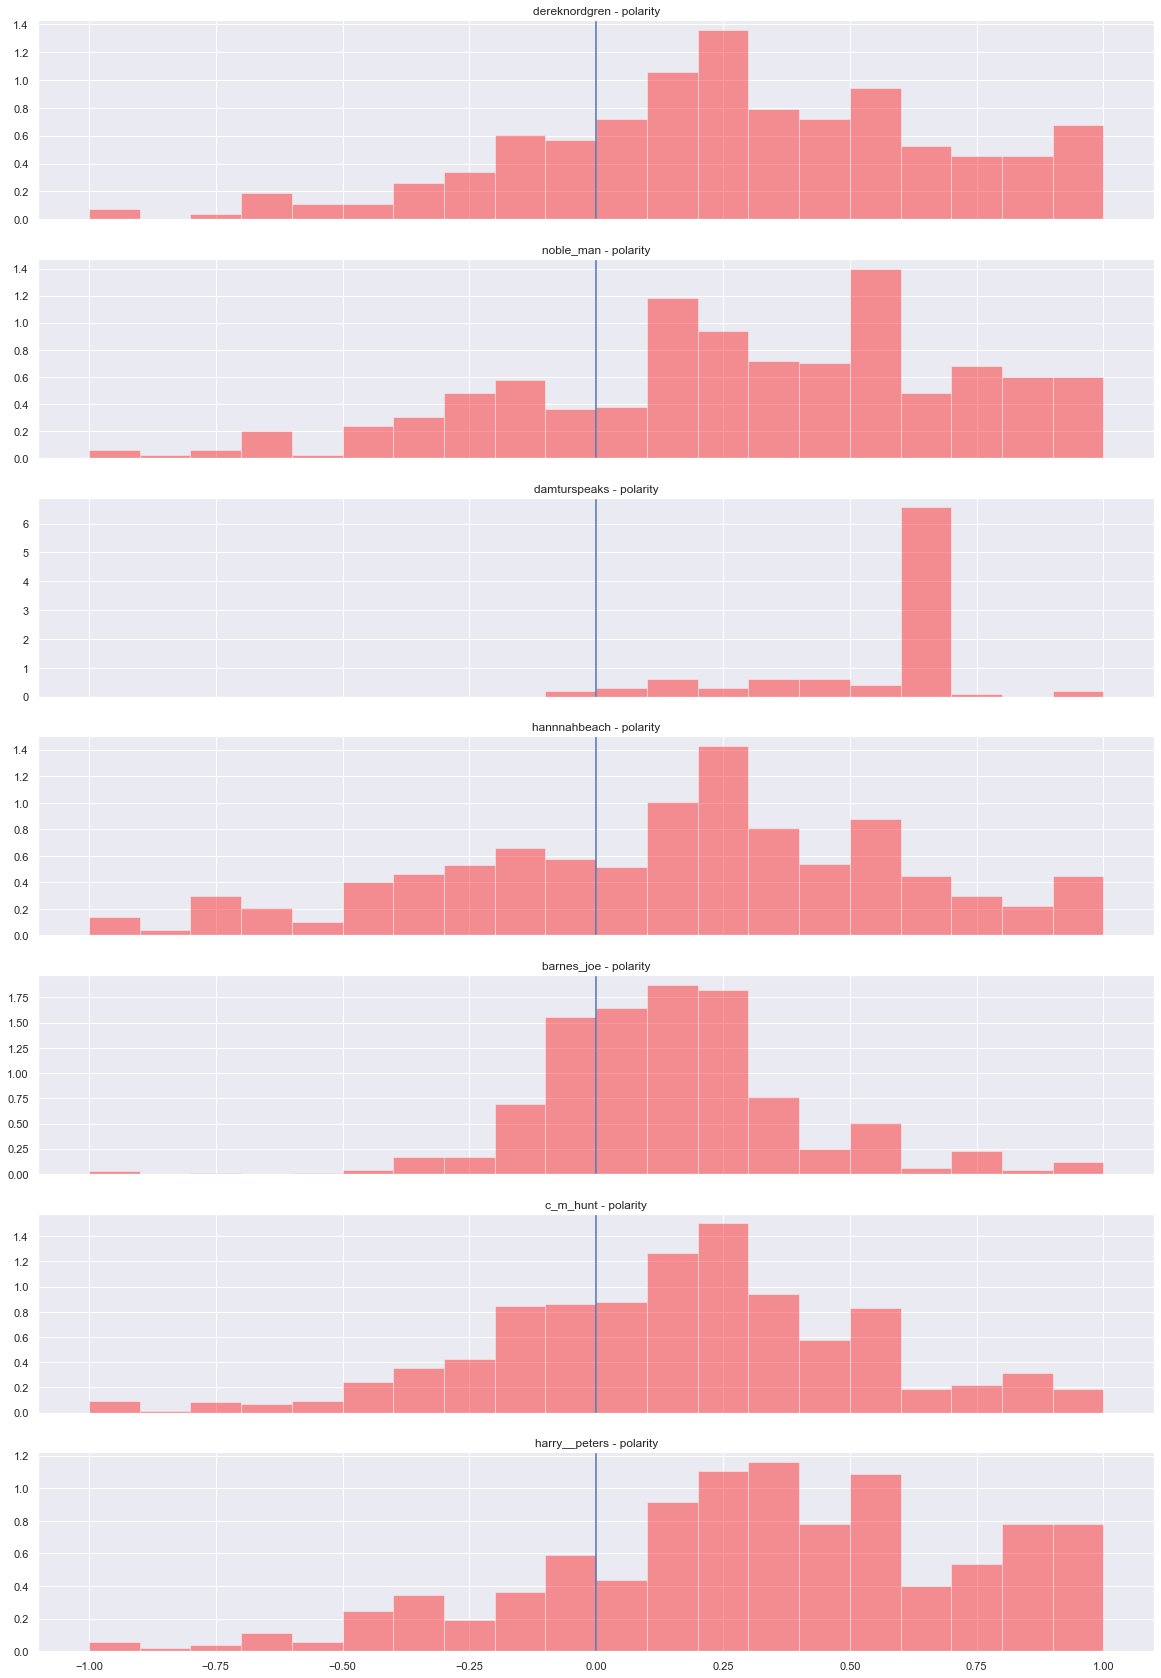

In [14]:
f, ax = plt.subplots(len(keys), 1, figsize=(20, 30), sharex=True)
x, y = 0, 0
polarity_bins = [i / 10 for i in range(-10,11)]
for i, k in enumerate(tweets):
    df_chart = tweets[k]
    args = {"bins":polarity_bins, "kde":False, "norm_hist":True}
    d = sns.distplot( df_chart[df_chart['polarity'] != 0][['polarity']], color="red", ax=ax[i], **args)
    d.axvline(0, 0)
    ax[i].set_title(f"{k} - polarity")


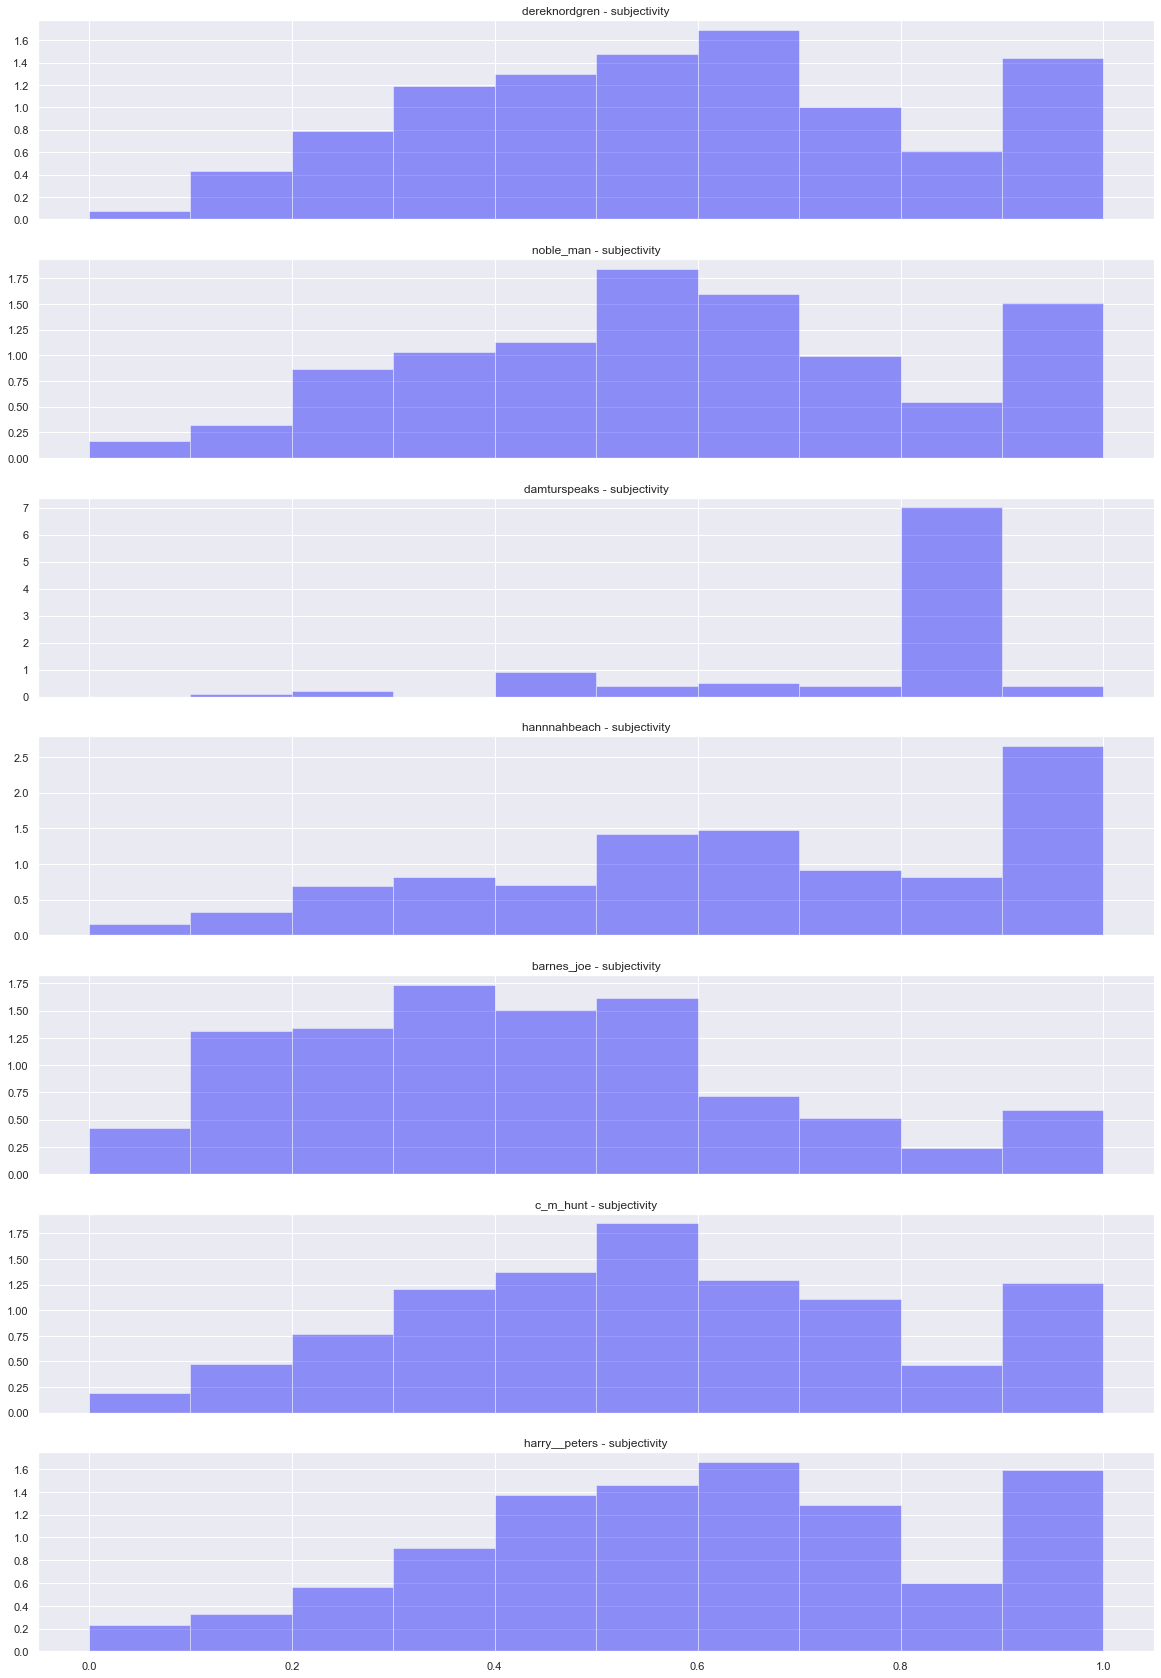

In [15]:
f, ax = plt.subplots(len(keys), 1, figsize=(20, 30), sharex=True)
x, y = 0, 0
subjectivity_bins = [i / 10 for i in range(0,11)]
for i, k in enumerate(tweets):
    df_chart = tweets[k]
    args = {"bins":subjectivity_bins, "kde":False, "norm_hist":True}
    d = sns.distplot( df_chart[df_chart['subjectivity'] != 0][['subjectivity']], color="blue", ax=ax[i], **args)
    ax[i].set_title(f"{k} - subjectivity")


In [28]:
df_all = pd.concat([t[1][['polarity', 'subjectivity','key','id', 'full_text']] for t in tweets.items()])

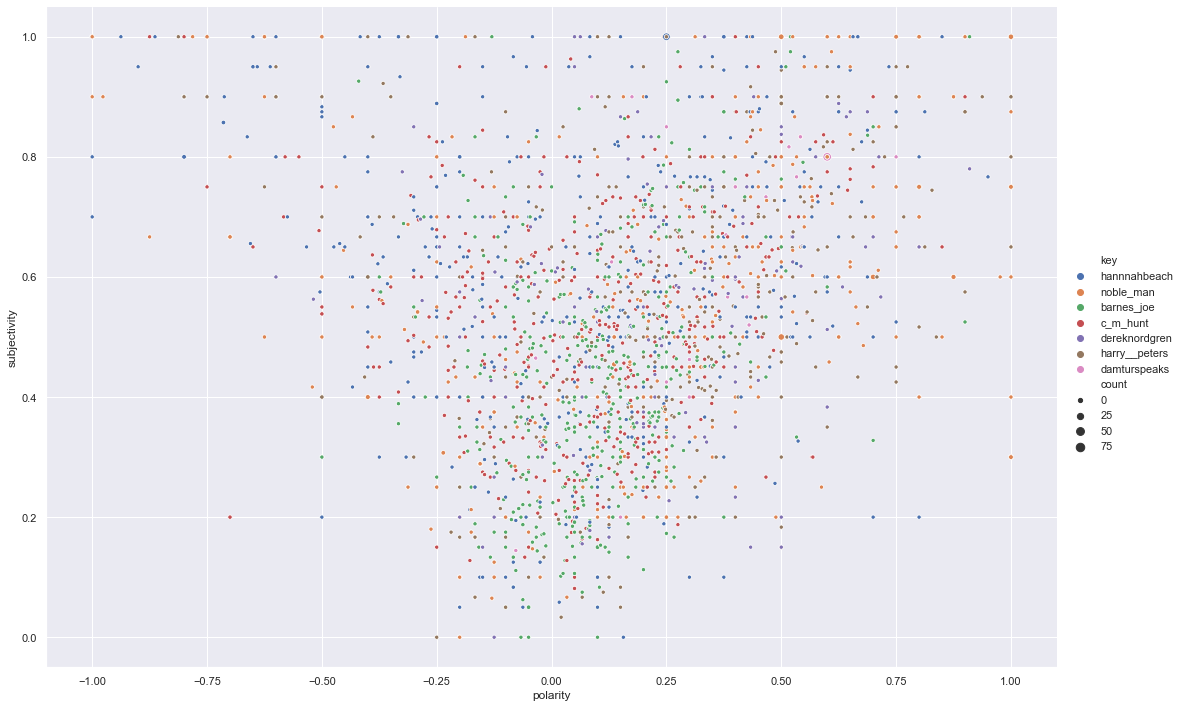

In [29]:
df = df_all.groupby(['polarity', 'subjectivity','key']).count()['id'].reset_index()
df = df.rename({"id": "count"}, axis=1)

sns.relplot(x='polarity', y='subjectivity', size="count", data=df[df['polarity'] != 0], height=10, aspect=1.5/1, hue='key')

### Basic NLP with spaCy
https://spacy.io/

https://spacy.io/api/annotation#named-entities

Untrained

In [30]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [32]:
for i, row in df_all[:100].iterrows():
    doc = nlp(row[tweet_text_field])
    print(row[tweet_text_field])
    print([(X.text, X.label_) for X in doc.ents])
    print("--------------------")
    #print([(X.text, X.label_) for X in doc.ents if X.label_ == 'PERSON'])

I hear it from everyone but wow, flying out of #LNK is incredible. Baggage check and security took 10 minutes, if even. The United gate is very nice. And 170Mb free WiFi!

Definitely worth the small extra charge over Omaha 👌✈️
[('LNK', 'PERSON'), ('10 minutes', 'TIME'), ('The United gate', 'FAC'), ('170Mb', 'DATE'), ('Omaha', 'GPE')]
--------------------
Best way to start a vacation? Free bottomless breakfast and coffee in a great lounge. Thanks @prioritypasscom + @Chase https://t.co/jDGPgCjb4g
[]
--------------------
Pop quiz: based on the gender stereotypes in this, was it published in 1918 or 2018? 😂

Too many absurd excerpts to even quote, it sure “scrambled my mind“ https://t.co/47UFmkP4X6
[('1918', 'DATE'), ('2018', 'DATE'), ('https://t.co/47UFmkP4X6', 'GPE')]
--------------------
Us (Jordan Peele) was the worst movie I’ve seen in a while. 2/10 at best. Strange plot, strange acting. Struggled to get through it.
[('Jordan Peele', 'PERSON'), ('2/10', 'CARDINAL')]
------------------

Funniest thing I’ve seen in a while 😂 https://t.co/3wUoRg49z7
[]
--------------------
Check out Gatorade Player of the Year on @Hudl https://t.co/5wsbpCNTjP #hudl
[('Gatorade Player of the Year', 'WORK_OF_ART')]
--------------------
When you finally get a hang of the beat https://t.co/nC2MbC85yn
[]
--------------------
Cris Collinsworth is the Kirk Herbstreit of professional football.
[('Cris Collinsworth', 'PERSON'), ('the Kirk Herbstreit', 'FAC')]
--------------------
These teams, a great game 7, extra innings, now rain delay…this couldn’t be better if you made it up #WorldSeries
[('7', 'CARDINAL')]
--------------------
@rkade93 https://t.co/w5vK3hinp5
[]
--------------------
@elonmusk’s tech talk on taking humans to Mars --&gt; https://t.co/YoGXzQkg7a wow that's a big rocket
[('@elonmusk', 'GPE'), ('Mars', 'LOC')]
--------------------
@DylanMatthews9 hahaha yeah, should’ve drafted Tony Romo to give me more of an edge
[('hahaha', 'ORG'), ('Tony Romo', 'PERSON')]
--------------------
